In [152]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wego = pd.read_csv(r'C:\Users\Barbie\Desktop\DA11\Python\projects\wego-the-brotherhood-of-steel\data\Headway_Data_8-1-2023_to_9-30-2023.csv')

wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0


In [3]:
pd.set_option('display.max_columns', None)

In [4]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In [5]:
def route_name(ROUTE_ABBR):
    if ROUTE_ABBR == 3: 
        return 'West End'
    elif ROUTE_ABBR == 7: 
        return 'Hillsboro'
    elif ROUTE_ABBR == 22: 
        return 'Bordeaux'
    elif ROUTE_ABBR == 23: 
        return 'Dickerson Pike'
    elif ROUTE_ABBR == 50:
        return 'Charlotte Pike'
    elif ROUTE_ABBR == 52: 
        return 'Nolensville Pike'
    elif ROUTE_ABBR == 55:
        return 'Murfreesboro Pike'
    elif ROUTE_ABBR == 56: 
        return 'Gallatin Pike'
    else:
        return 'none'

wego['ROUTE_NAME'] = wego['ROUTE_ABBR'].apply(route_name)

wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,Bordeaux
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Bordeaux
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,Bordeaux
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN,Hillsboro
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro


In [6]:
def week_day(SERVICE_ABBR):
    if SERVICE_ABBR == 1:
        return  'Weekday'
    elif SERVICE_ABBR == 2:
        return 'Saturday'
    elif SERVICE_ABBR == 3:
        return 'Sunday'
    else:
        return 'none'
    
wego['DAY_OF_WEEK'] = wego['SERVICE_ABBR'].apply(week_day)

wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,Bordeaux,Weekday
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Bordeaux,Weekday
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,Bordeaux,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN,Hillsboro,Saturday
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday


In [7]:
wego.describe()    

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
count,3.503290e+05,350329.000000,3.503290e+05,350329.000000,350329.000000,350329.000000,350329.000000,350329.000000,350318.000000,350329.000000,350329.000000,350329.000000,338861.000000,274738.000000,266062.000000,265893.000000,350329.000000,350329.000000,350329.000000,350329.000000,280000.000000,350329.000000,338858.000000,53102.000000
mean,1.202309e+08,1.298465,1.001038e+08,38.348033,3846.948617,1951.130514,351609.792895,0.006631,7.351284,0.579090,36.158433,-86.769952,-3.188796,18.186021,18.648561,0.518081,0.027902,0.168522,0.770841,0.015263,0.015193,0.011954,2.963915,12.628168
std,5.063417e+01,0.633101,3.227503e+05,20.338342,2042.237357,769.827675,1490.949102,0.097167,4.033002,0.793977,0.059113,0.065548,6.898842,12.261809,14.330568,7.161798,0.164693,0.374329,0.420292,0.122596,0.122320,0.108681,7.402934,6.393862
min,1.202308e+08,1.000000,9.945789e+07,3.000000,300.000000,0.000000,345104.000000,0.000000,1.000000,0.000000,36.048934,-86.955657,-948.533333,0.000000,0.000000,-64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-208.033333,0.000000
25%,1.202308e+08,1.000000,9.989140e+07,22.000000,2211.000000,1391.000000,350900.000000,0.000000,4.000000,0.000000,36.127172,-86.812719,-4.566666,10.000000,11.000000,-2.316667,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,1.202308e+08,1.000000,1.001346e+08,50.000000,5006.000000,2012.000000,352001.000000,0.000000,6.000000,0.000000,36.153870,-86.774535,-2.000000,15.000000,16.183333,0.033333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,1.202309e+08,1.000000,1.003481e+08,55.000000,5505.000000,2585.000000,352669.000000,0.000000,10.000000,1.000000,36.179753,-86.726914,-0.333333,20.000000,23.250000,2.483333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.950000,16.000000
max,1.202309e+08,3.000000,1.007029e+08,56.000000,9975.000000,3173.000000,354106.000000,4.000000,17.000000,2.000000,36.307973,-86.636496,88.383333,503.000000,590.433333,565.433333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,956.500000,118.000000


In [8]:
wego[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME', 'ADHERENCE']].sort_values('ADHERENCE')

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ADHERENCE
103162,2023-08-18,120230818,352052,52,MCC4_19,1,2023-08-18 06:15:00,-948.533333
19788,2023-08-04,120230804,350239,22,MCC5_10,1,2023-08-04 07:00:00,-675.000000
340625,2023-09-29,120230929,350478,23,DWMRT,1,2023-09-29 05:37:00,-618.166666
30377,2023-08-06,120230806,350455,23,DWMRT,1,2023-08-06 06:00:00,-542.233333
229460,2023-09-10,120230910,350455,23,DWMRT,1,2023-09-10 06:00:00,-539.933333
...,...,...,...,...,...,...,...,...
350249,2023-09-30,120230930,353393,7,21BK,0,2023-09-30 23:29:00,NaN
350295,2023-09-30,120230930,353438,7,MCC5_9,2,2023-09-30 16:03:00,NaN
350313,2023-09-30,120230930,353444,7,MCC5_9,2,2023-09-30 20:33:00,NaN
350319,2023-09-30,120230930,353446,7,MCC5_9,2,2023-09-30 21:38:00,NaN


In [9]:
wego_trimmed = wego[(wego['ADHERENCE'] > -60) & (wego['ADHERENCE'] < 60)]

In [10]:
wego_trimmed

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,Bordeaux,Weekday
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Bordeaux,Weekday
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,Bordeaux,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN,Hillsboro,Saturday
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday


# 1. What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?

In [11]:
# this would have to do with Adherence - is the bus running on time (+ number) or is it running late (- number)? 

In [12]:
# no more than 6 mins late or 1 min early      # negative is LATE  # positive is EARLY

In [13]:
early_buses = wego[wego['ADHERENCE'] > 1 & (wego['ADHERENCE'] < 60)]
early_buses

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.0,NaN,Bordeaux,Weekday
6,120230801,1,99457896,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-01 05:32:00,2023-08-01 05:30:30,2023-08-01 05:30:30,1.500000,NaN,NaN,NaN,0,0,1,0,NaN,0,0.0,NaN,Bordeaux,Weekday
10,120230801,1,99457900,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 06:10:00,2023-08-01 06:05:31,2023-08-01 06:05:31,4.483333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.0,NaN,Bordeaux,Weekday
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.0,NaN,Bordeaux,Weekday
13,120230801,1,99457903,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,2023-08-01 06:35:00,2023-08-01 06:30:59,2023-08-01 06:30:59,4.016666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.0,NaN,Bordeaux,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350271,120230930,2,100406557,2023-09-30,7,702,572,353430,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 10:03:00,2023-09-30 09:58:17,2023-09-30 09:58:17,4.716666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.0,NaN,Hillsboro,Saturday
350273,120230930,2,100406559,2023-09-30,7,702,2103,353431,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 10:31:00,2023-09-30 10:28:47,2023-09-30 10:28:47,2.216666,31.0,26.550000,-4.450000,1,0,0,0,0.0,0,0.0,NaN,Hillsboro,Saturday
350274,120230930,2,100406560,2023-09-30,7,702,2103,353431,0,FROM DOWNTOWN,HBHS,5.0,2,36.107575,-86.812719,2023-09-30 10:45:00,2023-09-30 10:42:54,2023-09-30 10:42:54,2.100000,NaN,NaN,NaN,0,0,1,0,NaN,0,0.0,NaN,Hillsboro,Saturday
350277,120230930,2,100406563,2023-09-30,7,702,2103,353432,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 11:33:00,2023-09-30 11:29:19,2023-09-30 11:29:19,3.683333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.0,NaN,Hillsboro,Saturday


In [14]:
early_buses.value_counts('ADJUSTED_EARLY_COUNT')

ADJUSTED_EARLY_COUNT
0    23257
1     9775
Name: count, dtype: int64

In [15]:
late_buses = wego[wego['ADHERENCE'] < -6 & (wego['ADHERENCE'] > -60)]
late_buses

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,Bordeaux,Weekday
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,Bordeaux,Weekday
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN,Hillsboro,Saturday
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday


In [16]:
late_buses.value_counts('ADJUSTED_LATE_COUNT')

ADJUSTED_LATE_COUNT
0    213640
1     59038
Name: count, dtype: int64

In [17]:
on_time_buses = wego[(wego['ADHERENCE'] < 1) & (wego['ADHERENCE'] > -6)]
on_time_buses

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,Bordeaux,Weekday
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,Bordeaux,Weekday
5,120230801,1,99457895,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 05:25:00,2023-08-01 05:24:03,2023-08-01 05:24:03,0.950000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350315,120230930,2,100406601,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 20:59:00,2023-09-30 21:02:20,2023-09-30 21:02:20,-3.333333,28.0,30.316666,2.316666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday
350316,120230930,2,100406602,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,HBHS,5.0,2,36.107575,-86.812719,2023-09-30 21:11:00,2023-09-30 21:12:40,2023-09-30 21:12:40,-1.666666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Hillsboro,Saturday
350317,120230930,2,100406603,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,-0.850000,28.0,26.066666,-1.933334,0,0,1,0,0.0,0,4.183333,5.0,Hillsboro,Saturday
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,Hillsboro,Saturday


In [18]:
on_time_buses.value_counts('ADJUSTED_ONTIME_COUNT')

ADJUSTED_ONTIME_COUNT
1    246219
Name: count, dtype: int64

In [19]:
count_of_early_buses = len(wego[wego['ADJUSTED_EARLY_COUNT'] == 1]) # 9775
count_of_late_buses = len(wego[wego['ADJUSTED_LATE_COUNT'] == 1]) # 59038
count_of_on_time_buses = len(on_time_buses)
count_of_ALL_buses_adjusted = (count_of_early_buses + count_of_late_buses + count_of_on_time_buses)


print("Count of early buses: ", count_of_early_buses)
print("Count of late buses: ", count_of_late_buses)
print("Count of on-time buses: ", count_of_on_time_buses)
print("Count of TOTAL buses: ", count_of_ALL_buses_adjusted)

Count of early buses:  9775
Count of late buses:  59038
Count of on-time buses:  246219
Count of TOTAL buses:  315032


In [20]:
perc_of_EARLY = (count_of_early_buses / count_of_ALL_buses_adjusted) * 100
perc_of_EARLY

3.102859392061759

In [21]:
perc_of_LATE = (count_of_late_buses / count_of_ALL_buses_adjusted) * 100
perc_of_LATE

18.740318443840625

In [22]:
perc_of_ON_TIME = (count_of_on_time_buses / count_of_ALL_buses_adjusted) * 100
perc_of_ON_TIME

78.15682216409762

# 2. How does direction of travel, route, or location affect the headway and on-time performance?

In [23]:
# ROUTE
# how many buses were:
# ... on time going to/from downtown

# ROUTE_ABBR
# how many buses were:
# ... on time in each route_abbr

#LAT/LONG
# how many buses were:
# ... on time in each lat/long

In [24]:
wego

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,Bordeaux,Weekday
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:03:43,2023-08-01 05:03:43,6.283333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Bordeaux,Weekday
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,Bordeaux,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 22:38:00,2023-09-30 22:49:18,2023-09-30 22:49:18,-11.300000,NaN,NaN,NaN,0,1,0,0,NaN,0,0.000000,NaN,Hillsboro,Saturday
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 22:59:00,2023-09-30 23:21:05,2023-09-30 23:21:05,-22.083333,30.0,47.500000,17.500000,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday


In [25]:
nan_totals = wego.isna().sum()  # finding the total nulls in each column
nan_totals

CALENDAR_ID                       0
SERVICE_ABBR                      0
ADHERENCE_ID                      0
DATE                              0
ROUTE_ABBR                        0
BLOCK_ABBR                        0
OPERATOR                          0
TRIP_ID                           0
OVERLOAD_ID                       0
ROUTE_DIRECTION_NAME              0
TIME_POINT_ABBR                   0
ROUTE_STOP_SEQUENCE              11
TRIP_EDGE                         0
LATITUDE                          0
LONGITUDE                         0
SCHEDULED_TIME                    0
ACTUAL_ARRIVAL_TIME           11459
ACTUAL_DEPARTURE_TIME         11468
ADHERENCE                     11468
SCHEDULED_HDWY                75591
ACTUAL_HDWY                   84267
HDWY_DEV                      84436
ADJUSTED_EARLY_COUNT              0
ADJUSTED_LATE_COUNT               0
ADJUSTED_ONTIME_COUNT             0
STOP_CANCELLED                    0
PREV_SCHED_STOP_CANCELLED     70329
IS_RELIEF                   

In [26]:
filter_nulls_actual_hdwy = wego[wego['ACTUAL_HDWY'].notna()]
filter_nulls_actual_hdwy 

# this filters out all of the nulls in Actual Headway

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday
12,120230801,1,99457902,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,1.500000,15.0,11.116666,-3.883334,1,0,0,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,Hillsboro,Saturday
350323,120230930,2,100406609,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,-8.616666,30.0,34.916666,4.916666,0,1,0,0,0.0,0,1.966666,5.0,Hillsboro,Saturday
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,-8.433333,30.0,35.266666,5.266666,0,1,0,0,0.0,0,0.000000,NaN,Hillsboro,Saturday
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,-4.316666,30.0,31.866666,1.866666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday


In [27]:
filter_nulls_actual_hdwy.describe()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
count,2.660620e+05,266062.000000,2.660620e+05,266062.000000,266062.000000,266062.000000,266062.000000,266062.000000,266057.000000,266062.000000,266062.000000,266062.000000,266062.000000,265893.000000,266062.000000,265893.000000,266062.000000,266062.000000,266062.000000,266062.000000,266062.000000,266062.000000,266059.000000,52569.000000
mean,1.202309e+08,1.295300,1.001035e+08,39.297852,3938.033740,1948.972905,351644.989175,0.004187,7.440921,0.241057,36.157361,-86.768045,-3.504940,18.104595,18.648561,0.518081,0.032936,0.172433,0.794631,0.008216,0.013662,0.013568,3.624429,12.690274
std,5.062855e+01,0.629335,3.231091e+05,20.248508,2025.538579,773.244891,1474.855319,0.076703,3.903855,0.427725,0.058148,0.065561,6.503736,11.907397,14.330568,7.161798,0.178469,0.377757,0.403972,0.090270,0.116085,0.115690,7.996357,6.391184
min,1.202308e+08,1.000000,9.945790e+07,3.000000,300.000000,56.000000,345106.000000,0.000000,1.000000,0.000000,36.048934,-86.955657,-948.533333,0.000000,0.000000,-64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-208.033333,0.000000
25%,1.202308e+08,1.000000,9.989095e+07,23.000000,2300.000000,1391.000000,350985.000000,0.000000,4.000000,0.000000,36.126788,-86.814220,-4.616666,10.000000,11.000000,-2.316667,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,1.202308e+08,1.000000,1.001345e+08,52.000000,5201.000000,2012.000000,352043.000000,0.000000,7.000000,0.000000,36.149997,-86.768557,-2.216666,15.000000,16.183333,0.033333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,1.202309e+08,1.000000,1.003481e+08,55.000000,5506.000000,2585.000000,352675.000000,0.000000,10.000000,0.000000,36.179753,-86.714100,-0.666666,20.000000,23.250000,2.483333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.950000,16.000000
max,1.202309e+08,3.000000,1.007029e+08,56.000000,9975.000000,3173.000000,354106.000000,4.000000,17.000000,1.000000,36.307973,-86.636496,85.666666,503.000000,590.433333,565.433333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,956.500000,118.000000


In [28]:
on_time_from_downtown_buses = filter_nulls_actual_hdwy[
    
                                                (filter_nulls_actual_hdwy['ADHERENCE'] < 1) &    # this meets the
                                                (filter_nulls_actual_hdwy['ADHERENCE'] > -6) &   # on-time standards
                                                (filter_nulls_actual_hdwy['ROUTE_DIRECTION_NAME'] == 'FROM DOWNTOWN')
    
                                              ]
on_time_from_downtown_buses

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Bordeaux,Weekday
19,120230801,1,99457909,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 07:25:00,2023-08-01 07:24:02,2023-08-01 07:24:02,0.966666,15.0,14.616666,-0.383334,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
25,120230801,1,99457915,2023-08-01,22,2200,1040,345111,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 08:15:00,2023-08-01 08:05:31,2023-08-01 08:18:01,-3.016666,15.0,14.833333,-0.166667,0,0,1,0,0.0,0,12.500000,5.0,Bordeaux,Weekday
26,120230801,1,99457916,2023-08-01,22,2200,1040,345111,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 08:25:00,2023-08-01 08:26:31,2023-08-01 08:26:31,-1.516666,15.0,14.850000,-0.150000,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350308,120230930,2,100406594,2023-09-30,7,702,2312,353443,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 19:15:00,2023-09-30 19:06:51,2023-09-30 19:19:03,-4.050000,30.0,28.350000,-1.650000,0,0,1,0,0.0,0,12.200000,12.0,Hillsboro,Saturday
350314,120230930,2,100406600,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 20:45:00,2023-09-30 20:40:02,2023-09-30 20:48:17,-3.283333,30.0,31.200000,1.200000,0,0,1,0,0.0,0,8.250000,NaN,Hillsboro,Saturday
350315,120230930,2,100406601,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 20:59:00,2023-09-30 21:02:20,2023-09-30 21:02:20,-3.333333,28.0,30.316666,2.316666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,Hillsboro,Saturday


In [29]:
on_time_to_downtown_buses = filter_nulls_actual_hdwy[
    
                                                (filter_nulls_actual_hdwy['ADJUSTED_EARLY_COUNT'] == 1) &
                                                (filter_nulls_actual_hdwy['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN')
    
                                              ]
on_time_to_downtown_buses

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
134,120230801,1,99458026,2023-08-01,22,2201,1617,345215,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 06:24:00,2023-08-01 06:21:57,2023-08-01 06:21:57,2.050000,15.0,11.933333,-3.066667,1,0,0,1,0.0,0,0.00,NaN,Bordeaux,Weekday
186,120230801,1,99458078,2023-08-01,22,2201,2427,345229,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 14:19:00,2023-08-01 14:17:42,2023-08-01 14:17:42,1.300000,12.0,4.616666,-7.383334,1,0,0,0,0.0,0,0.00,NaN,Bordeaux,Weekday
200,120230801,1,99458092,2023-08-01,22,2201,2427,345233,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 16:49:00,2023-08-01 16:43:47,2023-08-01 16:43:47,5.216666,12.0,3.800000,-8.200000,1,0,0,0,0.0,0,0.00,NaN,Bordeaux,Weekday
393,120230801,1,99458289,2023-08-01,22,2210,2125,345403,0,TO DOWNTOWN,25ACLARK,6.0,1,36.186350,-86.816998,2023-08-01 17:24:00,2023-08-01 17:19:42,2023-08-01 17:19:42,4.300000,25.0,21.666666,-3.333334,1,0,0,0,0.0,0,0.00,2.0,Bordeaux,Weekday
518,120230801,1,99458418,2023-08-01,23,2300,1893,345442,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-08-01 09:01:00,2023-08-01 08:53:43,2023-08-01 08:53:43,7.283333,12.0,0.066666,-11.933334,1,0,0,0,0.0,0,0.00,8.0,Dickerson Pike,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349130,120230930,2,100405190,2023-09-30,55,5504,1394,352525,0,TO DOWNTOWN,MXWHARF,6.0,0,36.148860,-86.762226,2023-09-30 06:51:00,2023-09-30 06:49:39,2023-09-30 06:49:39,1.350000,15.0,10.866666,-4.133334,1,0,0,0,0.0,0,0.00,NaN,Murfreesboro Pike,Saturday
349417,120230930,2,100405483,2023-09-30,55,5507,2697,352651,0,TO DOWNTOWN,MXTHOMP,8.0,0,36.127172,-86.711441,2023-09-30 09:23:00,2023-09-30 09:21:36,2023-09-30 09:21:36,1.400000,15.0,11.916666,-3.083334,1,0,0,0,0.0,0,0.00,NaN,Murfreesboro Pike,Saturday
349835,120230930,2,100405909,2023-09-30,56,5602,1824,352869,0,TO DOWNTOWN,GXMADISO,10.0,0,36.257412,-86.714068,2023-09-30 22:11:00,2023-09-30 22:06:38,2023-09-30 22:09:59,1.016666,32.0,30.866666,-1.133334,1,0,0,0,0.0,0,3.35,NaN,Gallatin Pike,Saturday
350192,120230930,2,100406476,2023-09-30,7,701,2062,353374,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 10:45:00,2023-09-30 10:43:11,2023-09-30 10:43:11,1.816666,30.0,27.283333,-2.716667,1,0,0,0,0.0,0,0.00,NaN,Hillsboro,Saturday


In [30]:
# how many buses were:
# ... on time going to/from downtown
# ... late going to/from downtown
# ... early going to/from downtown    

In [31]:
counts_on_time_to_downtown = len(on_time_to_downtown_buses)
print("Total of on-time buses going TO downtown: ", counts_on_time_to_downtown)

counts_on_time_from_downtown = len(on_time_from_downtown_buses)
print("Total of on-time buses going FROM downtown: ", counts_on_time_from_downtown)

Total of on-time buses going TO downtown:  4252
Total of on-time buses going FROM downtown:  105816


In [32]:
filter_nulls_actual_hdwy['ROUTE_ABBR'].sort_values().unique().tolist()

[3, 7, 22, 23, 50, 52, 55, 56]

In [33]:
number_3_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 3) & 
                                     (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]

number_3_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
1272,120230801,1,99459625,2023-08-01,3,300,2529,346048,0,TO DOWNTOWN,WHBG,6.0,1,36.149179,-86.858044,2023-08-01 04:49:00,2023-08-01 04:41:52,2023-08-01 04:50:18,-1.300000,NaN,NaN,NaN,0,0,1,0,0.0,0,8.433333,NaN,West End,Weekday
1273,120230801,1,99459626,2023-08-01,3,300,2529,346048,0,TO DOWNTOWN,HRWB,5.0,0,36.125659,-86.846500,2023-08-01 04:54:00,2023-08-01 04:54:05,2023-08-01 04:54:05,-0.083333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,West End,Weekday
1274,120230801,1,99459627,2023-08-01,3,300,2529,346048,0,TO DOWNTOWN,WE31,4.0,0,36.143233,-86.814581,2023-08-01 05:00:00,2023-08-01 04:59:35,2023-08-01 04:59:35,0.416666,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,West End,Weekday
1282,120230801,1,99459635,2023-08-01,3,300,2529,346050,0,TO DOWNTOWN,WHBG,6.0,1,36.149179,-86.858044,2023-08-01 05:59:00,2023-08-01 05:44:53,2023-08-01 06:02:56,-3.933333,20.0,23.833333,3.833333,0,0,1,0,0.0,0,18.050000,14.0,West End,Weekday
1283,120230801,1,99459636,2023-08-01,3,300,2529,346050,0,TO DOWNTOWN,HRWB,5.0,0,36.125659,-86.846500,2023-08-01 06:05:00,2023-08-01 06:07:40,2023-08-01 06:07:40,-2.666666,10.0,12.400000,2.400000,0,0,1,0,0.0,0,0.000000,NaN,West End,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347530,120230930,2,100403102,2023-09-30,3,312,2001,351175,0,TO DOWNTOWN,BRCJ,7.0,0,36.069474,-86.933429,2023-09-30 23:05:00,2023-09-30 23:05:28,2023-09-30 23:05:28,-0.466666,61.0,55.283333,-5.716667,0,0,1,0,0.0,0,0.000000,NaN,West End,Saturday
347531,120230930,2,100403103,2023-09-30,3,312,2001,351175,0,TO DOWNTOWN,HRWB,5.0,0,36.125659,-86.846500,2023-09-30 23:18:00,2023-09-30 23:18:48,2023-09-30 23:18:48,-0.800000,30.0,31.116666,1.116666,0,0,1,0,0.0,0,0.000000,NaN,West End,Saturday
347532,120230930,2,100403104,2023-09-30,3,312,2001,351175,0,TO DOWNTOWN,WE31,4.0,0,36.143233,-86.814581,2023-09-30 23:23:00,2023-09-30 23:24:41,2023-09-30 23:24:41,-1.683333,30.0,31.650000,1.650000,0,0,1,0,0.0,0,0.000000,NaN,West End,Saturday
347533,120230930,2,100403105,2023-09-30,3,312,2001,351175,0,TO DOWNTOWN,WE23,3.0,0,36.148685,-86.804611,2023-09-30 23:26:00,2023-09-30 23:28:01,2023-09-30 23:28:01,-2.016666,30.0,32.416666,2.416666,0,0,1,0,0.0,0,0.000000,NaN,West End,Saturday


In [34]:
number_3_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 3) & 
                                       (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_3_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
1277,120230801,1,99459630,2023-08-01,3,300,2529,346049,0,FROM DOWNTOWN,MCC5_5,2.0,1,36.167091,-86.781923,2023-08-01 05:20:00,2023-08-01 05:08:54,2023-08-01 05:21:20,-1.333333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.433333,7.0,West End,Weekday
1278,120230801,1,99459631,2023-08-01,3,300,2529,346049,0,FROM DOWNTOWN,WE23,3.0,0,36.149007,-86.804449,2023-08-01 05:30:00,2023-08-01 05:32:29,2023-08-01 05:32:29,-2.483333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,West End,Weekday
1279,120230801,1,99459632,2023-08-01,3,300,2529,346049,0,FROM DOWNTOWN,WE31,4.0,0,36.143040,-86.815175,2023-08-01 05:33:00,2023-08-01 05:36:07,2023-08-01 05:36:07,-3.116666,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,West End,Weekday
1280,120230801,1,99459633,2023-08-01,3,300,2529,346049,0,FROM DOWNTOWN,HRWB,5.0,0,36.126788,-86.845188,2023-08-01 05:37:00,2023-08-01 05:39:57,2023-08-01 05:39:57,-2.950000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,West End,Weekday
1281,120230801,1,99459634,2023-08-01,3,300,2529,346049,0,FROM DOWNTOWN,WHBG,6.0,2,36.149179,-86.858044,2023-08-01 05:45:00,2023-08-01 05:44:53,2023-08-01 05:44:53,0.116666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,West End,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347535,120230930,2,100403107,2023-09-30,3,312,2001,351176,0,FROM DOWNTOWN,MCC5_5,2.0,1,36.167091,-86.781923,2023-09-30 23:45:00,2023-09-30 23:42:53,2023-09-30 23:49:27,-4.450000,30.0,25.300000,-4.700000,0,0,1,0,0.0,0,6.566666,7.0,West End,Saturday
347536,120230930,2,100403108,2023-09-30,3,312,2001,351176,0,FROM DOWNTOWN,WE23,3.0,0,36.149007,-86.804449,2023-09-30 23:56:00,2023-09-30 23:58:48,2023-09-30 23:58:48,-2.800000,30.0,46.566666,16.566666,0,0,1,0,0.0,0,0.000000,NaN,West End,Saturday
347537,120230930,2,100403109,2023-09-30,3,312,2001,351176,0,FROM DOWNTOWN,WE31,4.0,0,36.143040,-86.815175,2023-09-30 23:58:00,2023-10-02 00:00:34,2023-10-01 00:02:24,-4.400000,30.0,45.750000,15.750000,0,0,1,0,0.0,0,1.833333,NaN,West End,Saturday
347538,120230930,2,100403110,2023-09-30,3,312,2001,351176,0,FROM DOWNTOWN,HRWB,5.0,0,36.126788,-86.845188,2023-10-01 00:03:00,2023-10-03 00:06:14,2023-10-02 00:06:14,-3.233333,30.0,44.950000,14.950000,0,0,1,0,0.0,0,0.000000,NaN,West End,Saturday


In [35]:
number_7_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 7) & 
                                     (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]
number_7_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
2123,120230801,1,99460956,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 14:31:00,2023-08-01 14:31:27,2023-08-01 14:31:27,-0.450000,15.0,1.150000,-13.850000,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Weekday
2124,120230801,1,99460957,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-08-01 14:41:00,2023-08-01 14:46:54,2023-08-01 14:46:54,-5.900000,15.0,5.950000,-9.050000,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Weekday
2125,120230801,1,99460958,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,MCC5_12,2.0,2,36.167091,-86.781923,2023-08-01 15:00:00,2023-08-01 15:05:41,2023-08-01 15:05:41,-5.683333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Hillsboro,Weekday
6179,120230801,1,99465660,2023-08-01,7,700,572,348436,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 15:04:00,2023-08-01 14:53:39,2023-08-01 15:08:46,-4.766666,15.0,19.166666,4.166666,0,0,1,0,0.0,0,15.116666,12.0,Hillsboro,Weekday
6185,120230801,1,99465666,2023-08-01,7,700,572,348438,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-08-01 16:34:00,2023-08-01 16:29:12,2023-08-01 16:37:07,-3.116666,15.0,21.233333,6.233333,0,0,1,0,0.0,0,7.916666,11.0,Hillsboro,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350305,120230930,2,100406591,2023-09-30,7,702,2312,353442,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 18:37:00,2023-09-30 18:35:37,2023-09-30 18:40:03,-3.050000,30.0,29.800000,-0.200000,0,0,1,0,0.0,0,4.433333,20.0,Hillsboro,Saturday
350306,120230930,2,100406592,2023-09-30,7,702,2312,353442,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,2023-09-30 18:45:00,2023-09-30 18:49:46,2023-09-30 18:49:46,-4.766666,30.0,30.966666,0.966666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday
350307,120230930,2,100406593,2023-09-30,7,702,2312,353442,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,2023-09-30 19:03:00,2023-09-30 19:06:51,2023-09-30 19:06:51,-3.850000,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Hillsboro,Saturday
350311,120230930,2,100406597,2023-09-30,7,702,2312,353444,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 20:11:00,2023-09-30 19:51:06,2023-09-30 20:12:40,-1.666666,30.0,30.433333,0.433333,0,0,1,0,0.0,0,21.566666,25.0,Hillsboro,Saturday


In [36]:
number_7_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 7) & 
                                       (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_7_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
6178,120230801,1,99465659,2023-08-01,7,700,572,348435,0,FROM DOWNTOWN,HBHS,5.0,2,36.107575,-86.812719,2023-08-01 14:52:00,2023-08-01 14:53:39,2023-08-01 14:53:39,-1.650000,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Hillsboro,Weekday
6188,120230801,1,99465669,2023-08-01,7,700,572,348439,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-08-01 17:15:00,2023-08-01 17:02:55,2023-08-01 17:17:26,-2.433333,15.0,16.266666,1.266666,0,0,1,0,0.0,0,14.516666,10.0,Hillsboro,Weekday
6191,120230801,1,99465673,2023-08-01,7,700,2400,348437,1,FROM DOWNTOWN,MCC5_9,3.0,0,36.167091,-86.781923,2023-08-01 15:45:00,2023-08-01 15:40:56,2023-08-01 15:48:53,-3.883333,15.0,15.950000,0.950000,0,0,1,0,0.0,0,7.950000,NaN,Hillsboro,Weekday
6193,120230801,1,99465675,2023-08-01,7,700,2400,348437,1,FROM DOWNTOWN,HBHS,5.0,2,36.107575,-86.812719,2023-08-01 16:23:00,2023-08-01 16:24:37,2023-08-01 16:24:37,-1.616666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Hillsboro,Weekday
6195,120230801,1,99465678,2023-08-01,7,701,341,348482,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-08-01 05:53:00,2023-08-01 05:54:18,2023-08-01 05:54:18,-1.300000,25.0,19.900000,-5.100000,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350314,120230930,2,100406600,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 20:45:00,2023-09-30 20:40:02,2023-09-30 20:48:17,-3.283333,30.0,31.200000,1.200000,0,0,1,0,0.0,0,8.250000,NaN,Hillsboro,Saturday
350315,120230930,2,100406601,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 20:59:00,2023-09-30 21:02:20,2023-09-30 21:02:20,-3.333333,28.0,30.316666,2.316666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday
350316,120230930,2,100406602,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,HBHS,5.0,2,36.107575,-86.812719,2023-09-30 21:11:00,2023-09-30 21:12:40,2023-09-30 21:12:40,-1.666666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Hillsboro,Saturday
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,Hillsboro,Saturday


In [37]:
number_22_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 22) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]
number_22_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,Bordeaux,Weekday
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346433,120230930,2,100401671,2023-09-30,22,2202,2832,350167,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-09-30 18:54:00,2023-09-30 18:56:16,2023-09-30 18:56:16,-2.266666,25.0,28.450000,3.450000,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Saturday
346440,120230930,2,100401678,2023-09-30,22,2202,2832,350169,0,TO DOWNTOWN,YGKG,7.0,1,36.203239,-86.840636,2023-09-30 20:11:00,2023-09-30 19:53:24,2023-09-30 20:10:03,0.950000,60.0,56.166666,-3.833334,0,0,1,1,1.0,0,16.650000,17.0,Bordeaux,Saturday
346441,120230930,2,100401679,2023-09-30,22,2202,2832,350169,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-09-30 20:19:00,2023-09-30 20:19:25,2023-09-30 20:19:25,-0.416666,35.0,36.000000,1.000000,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Saturday
346448,120230930,2,100401686,2023-09-30,22,2202,2832,350171,0,TO DOWNTOWN,YGKG,7.0,1,36.203239,-86.840636,2023-09-30 21:19:00,2023-09-30 21:20:12,2023-09-30 21:20:12,-1.200000,68.0,70.150000,2.150000,0,0,1,1,1.0,0,0.000000,NaN,Bordeaux,Saturday


In [38]:
number_22_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 22) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_22_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,Bordeaux,Weekday
5,120230801,1,99457895,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 05:25:00,2023-08-01 05:24:03,2023-08-01 05:24:03,0.950000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Bordeaux,Weekday
19,120230801,1,99457909,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 07:25:00,2023-08-01 07:24:02,2023-08-01 07:24:02,0.966666,15.0,14.616666,-0.383334,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346447,120230930,2,100401685,2023-09-30,22,2202,2832,350170,0,FROM DOWNTOWN,YGKG,13.0,2,36.203239,-86.840636,2023-09-30 21:18:00,2023-09-30 21:19:49,2023-09-30 21:19:49,-1.816666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Bordeaux,Saturday
346467,120230930,2,100401705,2023-09-30,22,2202,2832,350176,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-09-30 23:45:00,2023-09-30 23:44:58,2023-09-30 23:48:38,-3.633333,30.0,23.833333,-6.166667,0,0,1,0,0.0,0,3.666666,3.0,Bordeaux,Saturday
346468,120230930,2,100401706,2023-09-30,22,2202,2832,350176,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-09-30 23:57:00,2023-09-30 23:57:20,2023-09-30 23:57:20,-0.333333,30.0,18.200000,-11.800000,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Saturday
346470,120230930,2,100401708,2023-09-30,22,2202,2832,350176,0,FROM DOWNTOWN,HPKL,12.0,0,36.218706,-86.834137,2023-10-01 00:11:00,2023-10-03 00:13:56,2023-10-02 00:13:56,-2.933333,60.0,49.800000,-10.200000,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Saturday


In [39]:
number_23_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 23) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]
number_23_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
495,120230801,1,99458395,2023-08-01,23,2300,1893,345436,0,TO DOWNTOWN,DKTL,4.0,0,36.204256,-86.769112,2023-08-01 05:39:00,2023-08-01 05:41:16,2023-08-01 05:41:16,-2.266666,22.0,22.966666,0.966666,0,0,1,0,0.0,0,0.000000,NaN,Dickerson Pike,Weekday
496,120230801,1,99458396,2023-08-01,23,2300,1893,345436,0,TO DOWNTOWN,N1SP,3.0,0,36.175714,-86.774535,2023-08-01 05:45:00,2023-08-01 05:48:26,2023-08-01 05:48:26,-3.433333,22.0,22.933333,0.933333,0,0,1,0,0.0,0,0.000000,NaN,Dickerson Pike,Weekday
503,120230801,1,99458403,2023-08-01,23,2300,1893,345438,0,TO DOWNTOWN,DKTL,4.0,0,36.204256,-86.769112,2023-08-01 06:51:00,2023-08-01 06:50:59,2023-08-01 06:50:59,0.016666,12.0,11.300000,-0.700000,0,0,1,0,0.0,0,0.000000,NaN,Dickerson Pike,Weekday
504,120230801,1,99458404,2023-08-01,23,2300,1893,345438,0,TO DOWNTOWN,N1SP,3.0,0,36.175714,-86.774535,2023-08-01 06:57:00,2023-08-01 06:56:15,2023-08-01 06:56:15,0.750000,12.0,10.916666,-1.083334,0,0,1,0,0.0,0,0.000000,NaN,Dickerson Pike,Weekday
521,120230801,1,99458421,2023-08-01,23,2300,1893,345442,0,TO DOWNTOWN,MCC4_24,2.0,2,36.167091,-86.781923,2023-08-01 09:30:00,2023-08-01 09:32:04,2023-08-01 09:32:04,-2.066666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Dickerson Pike,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346936,120230930,2,100402182,2023-09-30,23,2313,379,350585,0,TO DOWNTOWN,DKTL,4.0,0,36.204256,-86.769112,2023-09-30 15:20:00,2023-09-30 15:25:31,2023-09-30 15:25:31,-5.516666,25.0,23.850000,-1.150000,0,0,1,1,0.0,0,0.000000,NaN,Dickerson Pike,Saturday
346937,120230930,2,100402183,2023-09-30,23,2313,379,350585,0,TO DOWNTOWN,N1SP,3.0,0,36.175714,-86.774535,2023-09-30 15:26:00,2023-09-30 15:31:07,2023-09-30 15:31:07,-5.116666,25.0,23.800000,-1.200000,0,0,1,0,0.0,0,0.000000,NaN,Dickerson Pike,Saturday
346938,120230930,2,100402184,2023-09-30,23,2313,379,350585,0,TO DOWNTOWN,MCC4_24,2.0,2,36.167091,-86.781923,2023-09-30 15:35:00,2023-09-30 15:35:41,2023-09-30 15:35:41,-0.683333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Dickerson Pike,Saturday
346946,120230930,2,100402192,2023-09-30,23,2313,1379,350587,0,TO DOWNTOWN,DWMRT,5.0,1,36.244207,-86.760509,2023-09-30 16:49:00,2023-09-30 16:39:05,2023-09-30 16:48:03,0.950000,25.0,23.000000,-2.000000,0,0,1,0,0.0,0,8.966666,11.0,Dickerson Pike,Saturday


In [40]:
number_23_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 23) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_23_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
491,120230801,1,99458391,2023-08-01,23,2300,1893,345435,0,FROM DOWNTOWN,DWMRT,5.0,1,36.244060,-86.757403,2023-08-01 05:00:00,2023-08-01 04:50:15,2023-08-01 05:03:14,-3.233333,15.0,17.950000,2.950000,0,0,1,0,0.0,0,12.983333,NaN,Dickerson Pike,Weekday
492,120230801,1,99458392,2023-08-01,23,2300,1893,345435,0,FROM DOWNTOWN,EDBC,8.0,0,36.231512,-86.780490,2023-08-01 05:09:00,2023-08-01 05:11:00,2023-08-01 05:11:00,-2.000000,15.0,15.450000,0.450000,0,0,1,0,0.0,0,0.000000,NaN,Dickerson Pike,Weekday
498,120230801,1,99458398,2023-08-01,23,2300,1893,345437,0,FROM DOWNTOWN,MCC4_24,2.0,1,36.167091,-86.781923,2023-08-01 06:00:00,2023-08-01 05:51:57,2023-08-01 06:05:01,-5.016666,20.0,23.016666,3.016666,0,0,1,0,0.0,0,13.066666,6.0,Dickerson Pike,Weekday
499,120230801,1,99458399,2023-08-01,23,2300,1893,345437,0,FROM DOWNTOWN,N1SP,3.0,0,36.175433,-86.774320,2023-08-01 06:06:00,2023-08-01 06:10:31,2023-08-01 06:10:31,-4.516666,21.0,25.450000,4.450000,0,0,1,0,0.0,0,0.000000,NaN,Dickerson Pike,Weekday
500,120230801,1,99458400,2023-08-01,23,2300,1893,345437,0,FROM DOWNTOWN,DKTL,4.0,0,36.205694,-86.768557,2023-08-01 06:13:00,2023-08-01 06:18:03,2023-08-01 06:18:03,-5.050000,21.0,26.066666,5.066666,0,0,1,0,0.0,0,0.000000,NaN,Dickerson Pike,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346950,120230930,2,100402196,2023-09-30,23,2313,1379,350588,0,FROM DOWNTOWN,MCC4_24,2.0,1,36.167091,-86.781923,2023-09-30 17:30:00,2023-09-30 17:16:50,2023-09-30 17:32:56,-2.933333,25.0,50.333333,25.333333,0,0,1,0,0.0,0,16.100000,15.0,Dickerson Pike,Saturday
346951,120230930,2,100402197,2023-09-30,23,2313,1379,350588,0,FROM DOWNTOWN,N1SP,3.0,0,36.175433,-86.774320,2023-09-30 17:36:00,2023-09-30 17:36:57,2023-09-30 17:36:57,-0.950000,25.0,46.350000,21.350000,0,0,1,0,0.0,0,0.000000,NaN,Dickerson Pike,Saturday
346952,120230930,2,100402198,2023-09-30,23,2313,1379,350588,0,FROM DOWNTOWN,DKTL,4.0,0,36.205694,-86.768557,2023-09-30 17:43:00,2023-09-30 17:44:56,2023-09-30 17:44:56,-1.933333,25.0,47.633333,22.633333,0,0,1,1,1.0,0,0.000000,NaN,Dickerson Pike,Saturday
346953,120230930,2,100402199,2023-09-30,23,2313,1379,350588,0,FROM DOWNTOWN,DWMRT,5.0,0,36.244207,-86.760509,2023-09-30 17:55:00,2023-09-30 17:57:42,2023-09-30 17:57:42,-2.700000,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Dickerson Pike,Saturday


In [41]:
number_50_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 50) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]
number_50_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
2126,120230801,1,99461142,2023-08-01,50,5000,1682,346804,0,TO DOWNTOWN,WALM,17.0,1,36.132451,-86.907214,2023-08-01 04:39:00,2023-08-01 04:22:50,2023-08-01 04:40:19,-1.316666,NaN,NaN,NaN,0,0,1,0,0.0,0,17.483333,NaN,Charlotte Pike,Weekday
2127,120230801,1,99461143,2023-08-01,50,5000,1682,346804,0,TO DOWNTOWN,HLWD,16.0,0,36.138535,-86.881130,2023-08-01 04:45:00,2023-08-01 04:45:24,2023-08-01 04:45:24,-0.400000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Weekday
2128,120230801,1,99461144,2023-08-01,50,5000,1682,346804,0,TO DOWNTOWN,WHBG,15.0,0,36.149997,-86.858261,2023-08-01 04:52:00,2023-08-01 04:52:28,2023-08-01 04:52:28,-0.466666,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Weekday
2129,120230801,1,99461145,2023-08-01,50,5000,1682,346804,0,TO DOWNTOWN,CH46,14.0,0,36.152077,-86.842746,2023-08-01 04:55:00,2023-08-01 04:54:44,2023-08-01 04:54:44,0.266666,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Weekday
2130,120230801,1,99461146,2023-08-01,50,5000,1682,346804,0,TO DOWNTOWN,28&CHARL,13.0,0,36.153870,-86.818414,2023-08-01 04:59:00,2023-08-01 04:57:11,2023-08-01 04:59:12,-0.200000,NaN,NaN,NaN,0,0,1,0,0.0,0,2.016666,NaN,Charlotte Pike,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348080,120230930,2,100404118,2023-09-30,50,5004,1673,351903,0,TO DOWNTOWN,WALM,17.0,1,36.132451,-86.907214,2023-09-30 23:35:00,2023-09-30 23:12:42,2023-09-30 23:37:22,-2.366666,30.0,31.716666,1.716666,0,0,1,0,0.0,0,24.666666,19.0,Charlotte Pike,Saturday
348081,120230930,2,100404119,2023-09-30,50,5004,1673,351903,0,TO DOWNTOWN,HLWD,16.0,0,36.138535,-86.881130,2023-09-30 23:41:00,2023-09-30 23:41:54,2023-09-30 23:41:54,-0.900000,30.0,28.766666,-1.233334,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Saturday
348082,120230930,2,100404120,2023-09-30,50,5004,1673,351903,0,TO DOWNTOWN,WHBG,15.0,0,36.149997,-86.858261,2023-09-30 23:47:00,2023-09-30 23:47:02,2023-09-30 23:47:02,-0.033333,30.0,27.866666,-2.133334,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Saturday
348083,120230930,2,100404121,2023-09-30,50,5004,1673,351903,0,TO DOWNTOWN,CH46,14.0,0,36.152077,-86.842746,2023-09-30 23:50:00,2023-09-30 23:50:14,2023-09-30 23:50:14,-0.233333,30.0,28.333333,-1.666667,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Saturday


In [42]:
number_50_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 50) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_50_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
2132,120230801,1,99461148,2023-08-01,50,5000,1682,346805,0,FROM DOWNTOWN,MCC5_1,12.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:05:13,2023-08-01 05:17:42,-2.700000,NaN,NaN,NaN,0,0,1,0,0.0,0,12.483333,5.0,Charlotte Pike,Weekday
2133,120230801,1,99461149,2023-08-01,50,5000,1682,346805,0,FROM DOWNTOWN,28&CHARL,13.0,0,36.154039,-86.818055,2023-08-01 05:24:00,2023-08-01 05:26:23,2023-08-01 05:26:23,-2.383333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Weekday
2134,120230801,1,99461150,2023-08-01,50,5000,1682,346805,0,FROM DOWNTOWN,CH46,14.0,0,36.152286,-86.842032,2023-08-01 05:28:00,2023-08-01 05:29:45,2023-08-01 05:29:45,-1.750000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Weekday
2135,120230801,1,99461151,2023-08-01,50,5000,1682,346805,0,FROM DOWNTOWN,WHBG,15.0,0,36.150052,-86.858652,2023-08-01 05:32:00,2023-08-01 05:33:54,2023-08-01 05:33:54,-1.900000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Weekday
2136,120230801,1,99461152,2023-08-01,50,5000,1682,346805,0,FROM DOWNTOWN,HLWD,16.0,0,36.138948,-86.880902,2023-08-01 05:38:00,2023-08-01 05:39:56,2023-08-01 05:39:56,-1.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348074,120230930,2,100404112,2023-09-30,50,5004,1673,351902,0,FROM DOWNTOWN,MCC5_1,12.0,1,36.167091,-86.781923,2023-09-30 22:45:00,2023-09-30 22:37:37,2023-09-30 22:46:14,-1.233333,30.0,28.683333,-1.316667,0,0,1,0,0.0,0,8.616666,10.0,Charlotte Pike,Saturday
348075,120230930,2,100404113,2023-09-30,50,5004,1673,351902,0,FROM DOWNTOWN,28&CHARL,13.0,0,36.154039,-86.818055,2023-09-30 22:55:00,2023-09-30 22:54:50,2023-09-30 22:54:50,0.166666,30.0,29.733333,-0.266667,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Saturday
348076,120230930,2,100404114,2023-09-30,50,5004,1673,351902,0,FROM DOWNTOWN,CH46,14.0,0,36.152286,-86.842032,2023-09-30 22:58:00,2023-09-30 22:59:32,2023-09-30 22:59:32,-1.533333,30.0,31.483333,1.483333,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Saturday
348077,120230930,2,100404115,2023-09-30,50,5004,1673,351902,0,FROM DOWNTOWN,WHBG,15.0,0,36.150052,-86.858652,2023-09-30 23:02:00,2023-09-30 23:03:07,2023-09-30 23:03:07,-1.116666,30.0,31.750000,1.750000,0,0,1,0,0.0,0,0.000000,NaN,Charlotte Pike,Saturday


In [43]:
number_52_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 52) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]
number_52_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
2900,120230801,1,99461930,2023-08-01,52,5200,2112,347114,0,TO DOWNTOWN,HCKP,9.0,1,36.048934,-86.713854,2023-08-01 04:33:00,2023-08-01 03:59:20,2023-08-01 04:34:46,-1.766666,NaN,NaN,NaN,0,0,1,0,0.0,0,35.433333,NaN,Nolensville Pike,Weekday
2901,120230801,1,99461931,2023-08-01,52,5200,2112,347114,0,TO DOWNTOWN,WMRT,5.0,0,36.082032,-86.726914,2023-08-01 04:45:00,2023-08-01 04:44:54,2023-08-01 04:47:32,-2.533333,NaN,NaN,NaN,0,0,1,0,0.0,0,2.633333,NaN,Nolensville Pike,Weekday
2902,120230801,1,99461932,2023-08-01,52,5200,2112,347114,0,TO DOWNTOWN,THNV,4.0,0,36.112037,-86.745666,2023-08-01 04:52:00,2023-08-01 04:52:54,2023-08-01 04:52:54,-0.900000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Nolensville Pike,Weekday
2903,120230801,1,99461933,2023-08-01,52,5200,2112,347114,0,TO DOWNTOWN,NVFG,3.0,0,36.135392,-86.759737,2023-08-01 04:57:00,2023-08-01 04:58:10,2023-08-01 04:58:10,-1.166666,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Nolensville Pike,Weekday
2904,120230801,1,99461934,2023-08-01,52,5200,2112,347114,0,TO DOWNTOWN,MCC4_19,2.0,2,36.167091,-86.781923,2023-08-01 05:10:00,2023-08-01 05:10:12,2023-08-01 05:10:12,-0.200000,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Nolensville Pike,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348682,120230930,2,100404732,2023-09-30,52,5212,3101,352233,0,TO DOWNTOWN,WMRT,5.0,0,36.082032,-86.726914,2023-09-30 21:07:00,2023-09-30 21:07:38,2023-09-30 21:07:38,-0.633333,30.0,30.233333,0.233333,0,0,1,0,0.0,0,0.000000,NaN,Nolensville Pike,Saturday
348683,120230930,2,100404733,2023-09-30,52,5212,3101,352233,0,TO DOWNTOWN,THNV,4.0,0,36.112037,-86.745666,2023-09-30 21:14:00,2023-09-30 21:13:07,2023-09-30 21:13:07,0.883333,30.0,28.866666,-1.133334,0,0,1,0,0.0,0,0.000000,NaN,Nolensville Pike,Saturday
348695,120230930,2,100404745,2023-09-30,52,5212,3101,352235,0,TO DOWNTOWN,WMRT,5.0,0,36.082032,-86.726914,2023-09-30 23:09:00,2023-09-30 23:11:37,2023-09-30 23:11:37,-2.616666,32.0,34.450000,2.450000,0,0,1,0,0.0,0,0.000000,NaN,Nolensville Pike,Saturday
348696,120230930,2,100404746,2023-09-30,52,5212,3101,352235,0,TO DOWNTOWN,THNV,4.0,0,36.112037,-86.745666,2023-09-30 23:15:00,2023-09-30 23:15:46,2023-09-30 23:15:46,-0.766666,31.0,32.250000,1.250000,0,0,1,0,0.0,0,0.000000,NaN,Nolensville Pike,Saturday


In [44]:
number_52_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 22) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_52_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,Bordeaux,Weekday
5,120230801,1,99457895,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 05:25:00,2023-08-01 05:24:03,2023-08-01 05:24:03,0.950000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday
18,120230801,1,99457908,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 07:15:00,2023-08-01 07:05:49,2023-08-01 07:16:44,-1.733333,15.0,15.233333,0.233333,0,0,1,0,0.0,0,10.916666,5.0,Bordeaux,Weekday
19,120230801,1,99457909,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 07:25:00,2023-08-01 07:24:02,2023-08-01 07:24:02,0.966666,15.0,14.616666,-0.383334,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346447,120230930,2,100401685,2023-09-30,22,2202,2832,350170,0,FROM DOWNTOWN,YGKG,13.0,2,36.203239,-86.840636,2023-09-30 21:18:00,2023-09-30 21:19:49,2023-09-30 21:19:49,-1.816666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Bordeaux,Saturday
346467,120230930,2,100401705,2023-09-30,22,2202,2832,350176,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-09-30 23:45:00,2023-09-30 23:44:58,2023-09-30 23:48:38,-3.633333,30.0,23.833333,-6.166667,0,0,1,0,0.0,0,3.666666,3.0,Bordeaux,Saturday
346468,120230930,2,100401706,2023-09-30,22,2202,2832,350176,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-09-30 23:57:00,2023-09-30 23:57:20,2023-09-30 23:57:20,-0.333333,30.0,18.200000,-11.800000,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Saturday
346470,120230930,2,100401708,2023-09-30,22,2202,2832,350176,0,FROM DOWNTOWN,HPKL,12.0,0,36.218706,-86.834137,2023-10-01 00:11:00,2023-10-03 00:13:56,2023-10-02 00:13:56,-2.933333,60.0,49.800000,-10.200000,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Saturday


In [45]:
number_55_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 55) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]
number_55_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
3853,120230801,1,99462915,2023-08-01,55,5500,1206,347480,0,TO DOWNTOWN,HHWM,11.0,1,36.052637,-86.654878,2023-08-01 04:23:00,2023-08-01 04:14:25,2023-08-01 04:23:54,-0.900000,NaN,NaN,NaN,0,0,1,0,0.0,0,9.483333,NaN,Murfreesboro Pike,Weekday
3854,120230801,1,99462916,2023-08-01,55,5500,1206,347480,0,TO DOWNTOWN,MXBELL,10.0,0,36.072852,-86.636862,2023-08-01 04:30:00,2023-08-01 04:30:37,2023-08-01 04:30:37,-0.616666,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Murfreesboro Pike,Weekday
3855,120230801,1,99462917,2023-08-01,55,5500,1206,347480,0,TO DOWNTOWN,MXDONEL,9.0,0,36.106276,-86.672801,2023-08-01 04:37:00,2023-08-01 04:39:14,2023-08-01 04:39:14,-2.233333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Murfreesboro Pike,Weekday
3856,120230801,1,99462918,2023-08-01,55,5500,1206,347480,0,TO DOWNTOWN,MXTHOMP,8.0,0,36.127172,-86.711441,2023-08-01 04:44:00,2023-08-01 04:44:44,2023-08-01 04:44:44,-0.733333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Murfreesboro Pike,Weekday
3857,120230801,1,99462919,2023-08-01,55,5500,1206,347480,0,TO DOWNTOWN,MXWHARF,6.0,0,36.148860,-86.762226,2023-08-01 04:54:00,2023-08-01 04:56:17,2023-08-01 04:56:17,-2.283333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Murfreesboro Pike,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349474,120230930,2,100405542,2023-09-30,55,5508,3098,352673,0,TO DOWNTOWN,HHWM,11.0,1,36.052637,-86.654878,2023-09-30 16:28:00,2023-09-30 16:03:24,2023-09-30 16:31:23,-3.383333,15.0,14.883333,-0.116667,0,0,1,0,0.0,0,27.983333,20.0,Murfreesboro Pike,Saturday
349476,120230930,2,100405544,2023-09-30,55,5508,3098,352673,0,TO DOWNTOWN,MXDONEL,9.0,0,36.106276,-86.672801,2023-09-30 16:43:00,2023-09-30 16:48:50,2023-09-30 16:48:50,-5.833333,15.0,15.433333,0.433333,0,0,1,0,0.0,0,0.000000,NaN,Murfreesboro Pike,Saturday
349477,120230930,2,100405545,2023-09-30,55,5508,3098,352673,0,TO DOWNTOWN,MXTHOMP,8.0,0,36.127172,-86.711441,2023-09-30 16:51:00,2023-09-30 16:53:27,2023-09-30 16:55:31,-4.516666,15.0,16.083333,1.083333,0,0,1,0,0.0,0,2.066666,NaN,Murfreesboro Pike,Saturday
349478,120230930,2,100405546,2023-09-30,55,5508,3098,352673,0,TO DOWNTOWN,MXWHARF,6.0,0,36.148860,-86.762226,2023-09-30 17:02:00,2023-09-30 17:06:14,2023-09-30 17:06:14,-4.233333,15.0,16.916666,1.916666,0,0,1,0,0.0,0,0.000000,NaN,Murfreesboro Pike,Saturday


In [46]:
number_55_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 55) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_55_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
3859,120230801,1,99462921,2023-08-01,55,5500,1206,347481,0,FROM DOWNTOWN,MCC4_15,5.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:08:13,2023-08-01 05:16:52,-1.866666,NaN,NaN,NaN,0,0,1,0,0.0,0,8.650000,8.0,Murfreesboro Pike,Weekday
3860,120230801,1,99462922,2023-08-01,55,5500,1206,347481,0,FROM DOWNTOWN,MXWHARF,6.0,0,36.148839,-86.762710,2023-08-01 05:24:00,2023-08-01 05:24:56,2023-08-01 05:26:36,-2.600000,NaN,NaN,NaN,0,0,1,0,0.0,0,1.666666,NaN,Murfreesboro Pike,Weekday
3861,120230801,1,99462923,2023-08-01,55,5500,1206,347481,0,FROM DOWNTOWN,MXTHOMP,8.0,0,36.128164,-86.713199,2023-08-01 05:35:00,2023-08-01 05:37:18,2023-08-01 05:37:18,-2.300000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Murfreesboro Pike,Weekday
3862,120230801,1,99462924,2023-08-01,55,5500,1206,347481,0,FROM DOWNTOWN,MXDONEL,9.0,0,36.105615,-86.672004,2023-08-01 05:41:00,2023-08-01 05:43:41,2023-08-01 05:43:41,-2.683333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Murfreesboro Pike,Weekday
3863,120230801,1,99462925,2023-08-01,55,5500,1206,347481,0,FROM DOWNTOWN,MXBELL,10.0,0,36.071990,-86.636496,2023-08-01 05:48:00,2023-08-01 05:50:43,2023-08-01 05:50:43,-2.716666,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Murfreesboro Pike,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349472,120230930,2,100405540,2023-09-30,55,5508,3098,352672,0,FROM DOWNTOWN,MXBELL,10.0,0,36.071990,-86.636496,2023-09-30 15:59:00,2023-09-30 15:58:50,2023-09-30 15:58:50,0.166666,16.0,4.983333,-11.016667,0,0,1,0,0.0,0,0.000000,NaN,Murfreesboro Pike,Saturday
349480,120230930,2,100405548,2023-09-30,55,5508,3098,352674,0,FROM DOWNTOWN,MCC4_15,5.0,1,36.167091,-86.781923,2023-09-30 17:30:00,2023-09-30 17:24:39,2023-09-30 17:35:27,-5.450000,15.0,19.983333,4.983333,0,0,1,0,0.0,0,10.800000,10.0,Murfreesboro Pike,Saturday
349481,120230930,2,100405549,2023-09-30,55,5508,3098,352674,0,FROM DOWNTOWN,MXWHARF,6.0,0,36.148839,-86.762710,2023-09-30 17:45:00,2023-09-30 17:49:58,2023-09-30 17:49:58,-4.966666,15.0,17.666666,2.666666,0,0,1,0,0.0,0,0.000000,NaN,Murfreesboro Pike,Saturday
349482,120230930,2,100405550,2023-09-30,55,5508,3098,352674,0,FROM DOWNTOWN,MXTHOMP,8.0,0,36.128164,-86.713199,2023-09-30 17:57:00,2023-09-30 18:01:13,2023-09-30 18:01:13,-4.216666,15.0,16.800000,1.800000,0,0,1,0,0.0,0,0.000000,NaN,Murfreesboro Pike,Saturday


In [47]:
number_56_to_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 56) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "TO DOWNTOWN")]
number_56_to_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
4999,120230801,1,99464095,2023-08-01,56,5600,2374,347902,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.300470,-86.695610,2023-08-01 04:30:00,2023-08-01 03:44:25,2023-08-01 04:31:17,-1.283333,NaN,NaN,NaN,0,0,1,0,0.0,0,46.866666,NaN,Gallatin Pike,Weekday
5000,120230801,1,99464096,2023-08-01,56,5600,2374,347902,0,TO DOWNTOWN,GXMADISO,10.0,0,36.257412,-86.714068,2023-08-01 04:40:00,2023-08-01 04:40:54,2023-08-01 04:40:54,-0.900000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Weekday
5001,120230801,1,99464097,2023-08-01,56,5600,2374,347902,0,TO DOWNTOWN,GXGRNFLD,9.0,0,36.210362,-86.733625,2023-08-01 04:49:00,2023-08-01 04:49:26,2023-08-01 04:49:26,-0.433333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Weekday
5002,120230801,1,99464098,2023-08-01,56,5600,2374,347902,0,TO DOWNTOWN,GXFIVEPT,8.0,0,36.179753,-86.750216,2023-08-01 04:55:00,2023-08-01 04:56:19,2023-08-01 04:56:19,-1.316666,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Weekday
5011,120230801,1,99464107,2023-08-01,56,5600,2374,347904,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.300470,-86.695610,2023-08-01 06:08:00,2023-08-01 05:50:09,2023-08-01 06:09:03,-1.050000,10.0,9.666666,-0.333334,0,0,1,0,0.0,0,18.900000,18.0,Gallatin Pike,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350090,120230930,2,100406170,2023-09-30,56,5605,520,353013,0,TO DOWNTOWN,MCC4_18,6.0,2,36.167091,-86.781923,2023-09-30 16:25:00,2023-09-30 16:29:29,2023-09-30 16:29:29,-4.483333,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Gallatin Pike,Saturday
350098,120230930,2,100406178,2023-09-30,56,5605,3013,353015,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.300470,-86.695610,2023-09-30 17:46:00,2023-09-30 17:31:41,2023-09-30 17:47:22,-1.366666,21.0,22.116666,1.116666,0,0,1,0,0.0,0,15.683333,23.0,Gallatin Pike,Saturday
350099,120230930,2,100406179,2023-09-30,56,5605,3013,353015,0,TO DOWNTOWN,GXMADISO,10.0,0,36.257412,-86.714068,2023-09-30 17:57:00,2023-09-30 18:00:59,2023-09-30 18:00:59,-3.983333,21.0,24.816666,3.816666,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Saturday
350100,120230930,2,100406180,2023-09-30,56,5605,3013,353015,0,TO DOWNTOWN,GXGRNFLD,9.0,0,36.210362,-86.733625,2023-09-30 18:07:00,2023-09-30 18:11:59,2023-09-30 18:11:59,-4.983333,20.0,24.883333,4.883333,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Saturday


In [48]:
number_56_from_downtown = on_time_buses[(on_time_buses['ROUTE_ABBR'] == 56) & 
                                      (on_time_buses['ROUTE_DIRECTION_NAME'] == "FROM DOWNTOWN")]
number_56_from_downtown

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
5004,120230801,1,99464100,2023-08-01,56,5600,2374,347903,0,FROM DOWNTOWN,MCC4_18,6.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:01:18,2023-08-01 05:16:44,-1.733333,NaN,NaN,NaN,0,0,1,0,0.0,0,15.433333,10.0,Gallatin Pike,Weekday
5005,120230801,1,99464101,2023-08-01,56,5600,2374,347903,0,FROM DOWNTOWN,GXFIVEPT,8.0,0,36.179433,-86.750111,2023-08-01 05:20:00,2023-08-01 05:21:26,2023-08-01 05:21:26,-1.433333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Weekday
5006,120230801,1,99464102,2023-08-01,56,5600,2374,347903,0,FROM DOWNTOWN,GXGRNFLD,9.0,0,36.210070,-86.733544,2023-08-01 05:26:00,2023-08-01 05:26:52,2023-08-01 05:26:52,-0.866666,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Weekday
5007,120230801,1,99464103,2023-08-01,56,5600,2374,347903,0,FROM DOWNTOWN,GXMADISO,10.0,0,36.256567,-86.714100,2023-08-01 05:35:00,2023-08-01 05:36:39,2023-08-01 05:36:39,-1.650000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Weekday
5008,120230801,1,99464104,2023-08-01,56,5600,2374,347903,0,FROM DOWNTOWN,GXRVRGAT,11.0,0,36.300827,-86.694508,2023-08-01 05:43:00,2023-08-01 05:45:58,2023-08-01 05:45:58,-2.966666,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350105,120230930,2,100406185,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,GXGRNFLD,9.0,0,36.210070,-86.733544,2023-09-30 18:53:00,2023-09-30 18:54:29,2023-09-30 18:54:29,-1.483333,20.0,18.333333,-1.666667,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Saturday
350106,120230930,2,100406186,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,GXMADISO,10.0,0,36.256567,-86.714100,2023-09-30 19:04:00,2023-09-30 19:07:00,2023-09-30 19:07:00,-3.000000,20.0,18.883333,-1.116667,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Saturday
350107,120230930,2,100406187,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,GXRVRGAT,11.0,0,36.300827,-86.694508,2023-09-30 19:14:00,2023-09-30 19:15:59,2023-09-30 19:15:59,-1.983333,20.0,19.500000,-0.500000,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Saturday
350108,120230930,2,100406188,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,SAMS,12.0,0,36.307973,-86.685963,2023-09-30 19:18:00,2023-09-30 19:17:58,2023-09-30 19:19:55,-1.916666,20.0,19.333333,-0.666667,0,0,1,0,0.0,0,1.950000,NaN,Gallatin Pike,Saturday


In [49]:
# graph a corrlation between headway, on-time performance
# direction as to and from downtown - one variable but 2 different colors to and from downtown
# and the other variable would be headway
# x axis headway, y axis ?

In [50]:
on_time_buses.value_counts('ROUTE_ABBR')

ROUTE_ABBR
56    44069
55    39741
52    35683
50    33337
3     32626
23    30720
22    17999
7     12044
Name: count, dtype: int64

In [51]:
on_time_buses.value_counts('ROUTE_DIRECTION_NAME')

ROUTE_DIRECTION_NAME
FROM DOWNTOWN    125399
TO DOWNTOWN      120820
Name: count, dtype: int64

In [52]:
on_time_buses_filtered = on_time_buses[on_time_buses['ACTUAL_HDWY'].notna()]

on_time_buses_filtered

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,-1.716666,35.0,37.666666,2.666666,0,0,1,0,0.0,0,13.216666,10.0,Bordeaux,Weekday
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,-1.916666,35.0,36.966666,1.966666,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,-0.183333,15.0,14.516666,-0.483334,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,10.800000,5.0,Bordeaux,Weekday
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,12.533333,7.0,Bordeaux,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350314,120230930,2,100406600,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 20:45:00,2023-09-30 20:40:02,2023-09-30 20:48:17,-3.283333,30.0,31.200000,1.200000,0,0,1,0,0.0,0,8.250000,NaN,Hillsboro,Saturday
350315,120230930,2,100406601,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 20:59:00,2023-09-30 21:02:20,2023-09-30 21:02:20,-3.333333,28.0,30.316666,2.316666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday
350317,120230930,2,100406603,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,-0.850000,28.0,26.066666,-1.933334,0,0,1,0,0.0,0,4.183333,5.0,Hillsboro,Saturday
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,Hillsboro,Saturday


In [53]:
# avg headway for each route abbr

In [54]:
avg_hdwy_56 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 56].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_56['ROUTE_ABBR'] = 56
avg_hdwy_56

,0,ROUTE_ABBR
ACTUAL_HDWY,13.560134,56


In [55]:
avg_hdwy_55 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 55].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_55['ROUTE_ABBR'] = 55
avg_hdwy_55

,0,ROUTE_ABBR
ACTUAL_HDWY,12.954516,55


In [56]:
avg_hdwy_52 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 52].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_52['ROUTE_ABBR'] = 52
avg_hdwy_52

,0,ROUTE_ABBR
ACTUAL_HDWY,20.207879,52


In [57]:
avg_hdwy_50 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 50].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_50['ROUTE_ABBR'] = 50
avg_hdwy_50

,0,ROUTE_ABBR
ACTUAL_HDWY,19.301724,50


In [58]:
avg_hdwy_3 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 3].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_3['ROUTE_ABBR'] = 3
avg_hdwy_3

,0,ROUTE_ABBR
ACTUAL_HDWY,20.037843,3


In [59]:
avg_hdwy_23 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 23].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_23['ROUTE_ABBR'] = 23
avg_hdwy_23

,0,ROUTE_ABBR
ACTUAL_HDWY,18.797702,23


In [60]:
avg_hdwy_22 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 22].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_22['ROUTE_ABBR'] = 22
avg_hdwy_22

,0,ROUTE_ABBR
ACTUAL_HDWY,29.832546,22


In [61]:
avg_hdwy_7 = pd.DataFrame(on_time_buses_filtered[on_time_buses_filtered['ROUTE_ABBR'] == 7].agg({'ACTUAL_HDWY' : 'mean'}))
avg_hdwy_7['ROUTE_ABBR'] = 7
avg_hdwy_7

,0,ROUTE_ABBR
ACTUAL_HDWY,22.820139,7


In [62]:
all_routes_avg_headway = pd.concat([avg_hdwy_56, avg_hdwy_55, avg_hdwy_52, avg_hdwy_50, avg_hdwy_3,
                                   avg_hdwy_23, avg_hdwy_22, avg_hdwy_7])
all_routes_avg_headway

,0,ROUTE_ABBR
ACTUAL_HDWY,13.560134,56
ACTUAL_HDWY,12.954516,55
ACTUAL_HDWY,20.207879,52
ACTUAL_HDWY,19.301724,50
ACTUAL_HDWY,20.037843,3
ACTUAL_HDWY,18.797702,23
ACTUAL_HDWY,29.832546,22
ACTUAL_HDWY,22.820139,7


In [63]:
all_routes_avg_headway_TEST = (

filter_nulls_actual_hdwy.loc[filter_nulls_actual_hdwy['ROUTE_ABBR'] == 56]
# on_time_buses.loc[on_time_buses['ROUTE_ABBR'] == 55]
# on_time_buses.loc[on_time_buses['ROUTE_ABBR'] == 52]
# on_time_buses.loc[on_time_buses['ROUTE_ABBR'] == 50]
# on_time_buses.loc[on_time_buses['ROUTE_ABBR'] == 3]
# on_time_buses.loc[on_time_buses['ROUTE_ABBR'] == 23]
# on_time_buses.loc[on_time_buses['ROUTE_ABBR'] == 22]
# on_time_buses.loc[on_time_buses['ROUTE_ABBR'] == 7]

[['DATE', 'ADHERENCE_ID', 'ROUTE_ABBR', 'ROUTE_DIRECTION_NAME', 'ACTUAL_HDWY']]
    
.sort_values(['DATE', 'ADHERENCE_ID'])
.sum()
.reset_index()
)

all_routes_avg_headway_TEST

,index,0
0,DATE,2023-08-012023-08-012023-08-012023-08-012023-0...
1,ADHERENCE_ID,4840232685950
2,ROUTE_ABBR,2707656
3,ROUTE_DIRECTION_NAME,TO DOWNTOWNTO DOWNTOWNTO DOWNTOWNTO DOWNTOWNFR...
4,ACTUAL_HDWY,684585.483943


In [64]:
avg_hdwy_route_abbrs = all_routes_avg_headway['ROUTE_ABBR'].value_counts().reset_index().rename(
    columns = {'0':'AVG_HDWY',
              'ROUTE_ABBR':'ROUTE_ABBR'}) 
avg_hdwy_route_abbrs

,ROUTE_ABBR,count
0,56,1
1,55,1
2,52,1
3,50,1
4,3,1
5,23,1
6,22,1
7,7,1


In [65]:
on_time_buses

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,2023-08-01 04:42:00,2023-08-01 04:37:38,2023-08-01 04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN,Bordeaux,Weekday
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,2023-08-01 04:46:00,2023-08-01 04:48:27,2023-08-01 04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,2023-08-01 04:54:00,2023-08-01 04:54:56,2023-08-01 04:54:56,-0.933333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:03:43,2023-08-01 05:16:35,-1.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0,Bordeaux,Weekday
5,120230801,1,99457895,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,2023-08-01 05:25:00,2023-08-01 05:24:03,2023-08-01 05:24:03,0.950000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Bordeaux,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350315,120230930,2,100406601,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,2023-09-30 20:59:00,2023-09-30 21:02:20,2023-09-30 21:02:20,-3.333333,28.0,30.316666,2.316666,0,0,1,0,0.0,0,0.000000,NaN,Hillsboro,Saturday
350316,120230930,2,100406602,2023-09-30,7,702,2312,353445,0,FROM DOWNTOWN,HBHS,5.0,2,36.107575,-86.812719,2023-09-30 21:11:00,2023-09-30 21:12:40,2023-09-30 21:12:40,-1.666666,NaN,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN,Hillsboro,Saturday
350317,120230930,2,100406603,2023-09-30,7,702,2312,353446,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,-0.850000,28.0,26.066666,-1.933334,0,0,1,0,0.0,0,4.183333,5.0,Hillsboro,Saturday
350320,120230930,2,100406606,2023-09-30,7,702,2312,353447,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,-5.900000,30.0,36.716666,6.716666,0,0,1,0,0.0,0,7.033333,NaN,Hillsboro,Saturday


In [66]:
on_time_buses[on_time_buses['ROUTE_ABBR'] == 56]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,ROUTE_NAME,DAY_OF_WEEK
4999,120230801,1,99464095,2023-08-01,56,5600,2374,347902,0,TO DOWNTOWN,GXRVRGAT,11.0,1,36.300470,-86.695610,2023-08-01 04:30:00,2023-08-01 03:44:25,2023-08-01 04:31:17,-1.283333,NaN,NaN,NaN,0,0,1,0,0.0,0,46.866666,NaN,Gallatin Pike,Weekday
5000,120230801,1,99464096,2023-08-01,56,5600,2374,347902,0,TO DOWNTOWN,GXMADISO,10.0,0,36.257412,-86.714068,2023-08-01 04:40:00,2023-08-01 04:40:54,2023-08-01 04:40:54,-0.900000,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Weekday
5001,120230801,1,99464097,2023-08-01,56,5600,2374,347902,0,TO DOWNTOWN,GXGRNFLD,9.0,0,36.210362,-86.733625,2023-08-01 04:49:00,2023-08-01 04:49:26,2023-08-01 04:49:26,-0.433333,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Weekday
5002,120230801,1,99464098,2023-08-01,56,5600,2374,347902,0,TO DOWNTOWN,GXFIVEPT,8.0,0,36.179753,-86.750216,2023-08-01 04:55:00,2023-08-01 04:56:19,2023-08-01 04:56:19,-1.316666,NaN,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Weekday
5004,120230801,1,99464100,2023-08-01,56,5600,2374,347903,0,FROM DOWNTOWN,MCC4_18,6.0,1,36.167091,-86.781923,2023-08-01 05:15:00,2023-08-01 05:01:18,2023-08-01 05:16:44,-1.733333,NaN,NaN,NaN,0,0,1,0,0.0,0,15.433333,10.0,Gallatin Pike,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350105,120230930,2,100406185,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,GXGRNFLD,9.0,0,36.210070,-86.733544,2023-09-30 18:53:00,2023-09-30 18:54:29,2023-09-30 18:54:29,-1.483333,20.0,18.333333,-1.666667,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Saturday
350106,120230930,2,100406186,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,GXMADISO,10.0,0,36.256567,-86.714100,2023-09-30 19:04:00,2023-09-30 19:07:00,2023-09-30 19:07:00,-3.000000,20.0,18.883333,-1.116667,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Saturday
350107,120230930,2,100406187,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,GXRVRGAT,11.0,0,36.300827,-86.694508,2023-09-30 19:14:00,2023-09-30 19:15:59,2023-09-30 19:15:59,-1.983333,20.0,19.500000,-0.500000,0,0,1,0,0.0,0,0.000000,NaN,Gallatin Pike,Saturday
350108,120230930,2,100406188,2023-09-30,56,5605,3013,353016,0,FROM DOWNTOWN,SAMS,12.0,0,36.307973,-86.685963,2023-09-30 19:18:00,2023-09-30 19:17:58,2023-09-30 19:19:55,-1.916666,20.0,19.333333,-0.666667,0,0,1,0,0.0,0,1.950000,NaN,Gallatin Pike,Saturday


## 3. How does time of day or day of week affect headway and on-time performance?

In [67]:
# start with DAY OF THE WEEK
    # * use the Service_Abbr column which breaks down as:
             #  1 = Weekday
             #  2 = Saturday
             #  3 = Sunday
                
                
# **sort values is like an order by in SQL**

In [75]:
filtered_cols_for_q_3 = filter_nulls_actual_hdwy.loc[:, [
        'DAY_OF_WEEK', 'ROUTE_NAME', 'ADHERENCE_ID', 'DATE', 'TIME_POINT_ABBR', 
        'SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME',
        'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'ADJUSTED_ONTIME_COUNT'
    
]]

filtered_cols_for_q_3

,DAY_OF_WEEK,ROUTE_NAME,ADHERENCE_ID,DATE,TIME_POINT_ABBR,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,SCHEDULED_HDWY,ACTUAL_HDWY,ADJUSTED_ONTIME_COUNT
7,Weekday,Bordeaux,99457897,2023-08-01,MHSP,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,35.0,37.666666,1
8,Weekday,Bordeaux,99457898,2023-08-01,ELIZ,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,35.0,36.966666,1
9,Weekday,Bordeaux,99457899,2023-08-01,CV23,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,15.0,14.516666,1
11,Weekday,Bordeaux,99457901,2023-08-01,MCC5_10,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,15.0,12.833333,1
12,Weekday,Bordeaux,99457902,2023-08-01,CV23,2023-08-01 06:25:00,2023-08-01 06:23:30,2023-08-01 06:23:30,15.0,11.116666,0
...,...,...,...,...,...,...,...,...,...,...,...
350320,Saturday,Hillsboro,100406606,2023-09-30,MCC5_9,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,30.0,36.716666,1
350323,Saturday,Hillsboro,100406609,2023-09-30,HBHS,2023-09-30 22:16:00,2023-09-30 22:22:39,2023-09-30 22:24:37,30.0,34.916666,0
350324,Saturday,Hillsboro,100406610,2023-09-30,21BK,2023-09-30 22:23:00,2023-09-30 22:31:26,2023-09-30 22:31:26,30.0,35.266666,0
350326,Saturday,Hillsboro,100406612,2023-09-30,MCC5_9,2023-09-30 22:45:00,2023-09-30 22:49:19,2023-09-30 22:49:19,30.0,31.866666,1


In [88]:
on_time_weekday = filtered_cols_for_q_3[
    (filtered_cols_for_q_3['ADJUSTED_ONTIME_COUNT'] == 1)
    & (filtered_cols_for_q_3['DAY_OF_WEEK'] == 'Weekday')
]
on_time_weekday   # these are all the on-time buses on a WEEKDAY

,DAY_OF_WEEK,ROUTE_NAME,ADHERENCE_ID,DATE,TIME_POINT_ABBR,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,SCHEDULED_HDWY,ACTUAL_HDWY,ADJUSTED_ONTIME_COUNT
7,Weekday,Bordeaux,99457897,2023-08-01,MHSP,2023-08-01 05:42:00,2023-08-01 05:30:30,2023-08-01 05:43:43,35.0,37.666666,1
8,Weekday,Bordeaux,99457898,2023-08-01,ELIZ,2023-08-01 05:46:00,2023-08-01 05:47:55,2023-08-01 05:47:55,35.0,36.966666,1
9,Weekday,Bordeaux,99457899,2023-08-01,CV23,2023-08-01 05:54:00,2023-08-01 05:54:11,2023-08-01 05:54:11,15.0,14.516666,1
11,Weekday,Bordeaux,99457901,2023-08-01,MCC5_10,2023-08-01 06:15:00,2023-08-01 06:05:31,2023-08-01 06:16:19,15.0,12.833333,1
14,Weekday,Bordeaux,99457904,2023-08-01,MHSP,2023-08-01 06:42:00,2023-08-01 06:30:59,2023-08-01 06:43:31,60.0,59.800000,1
...,...,...,...,...,...,...,...,...,...,...,...
346151,Weekday,Hillsboro,100384839,2023-09-29,HBHS,2023-09-29 17:07:00,2023-09-29 16:49:53,2023-09-29 17:07:51,18.0,16.683333,1
346154,Weekday,Hillsboro,100384842,2023-09-29,MCC5_9,2023-09-29 17:45:00,2023-09-29 17:32:51,2023-09-29 17:49:21,15.0,16.916666,1
346155,Weekday,Hillsboro,100384843,2023-09-29,21BK,2023-09-29 18:01:00,2023-09-29 18:03:10,2023-09-29 18:03:10,14.0,15.066666,1
346163,Weekday,Murfreesboro Pike,100386249,2023-09-29,ARTS,2023-09-29 15:12:00,2023-09-29 14:47:27,2023-09-29 15:14:34,0.0,0.150000,1


In [89]:
on_time_weekday.describe()

,ADHERENCE_ID,SCHEDULED_HDWY,ACTUAL_HDWY,ADJUSTED_ONTIME_COUNT
count,1.678320e+05,167722.000000,167832.000000,167832.0
mean,1.000975e+08,16.653987,16.464071,1.0
std,3.284865e+05,12.027980,13.489567,0.0
min,9.945790e+07,0.000000,0.000000,1.0
25%,9.986279e+07,10.000000,10.066666,1.0
50%,1.001272e+08,15.000000,13.883333,1.0
75%,1.003265e+08,20.000000,19.900000,1.0
max,1.007029e+08,503.000000,514.366666,1.0


In [ ]:
# ax = on_time_weekday.plot.bar(x = 'ROUTE_NAME', y = 'ACTUAL_HDWY', rot = 0)
# ax

In [118]:
shortened_df_on_time_weekday = on_time_weekday.loc[:, ['ROUTE_NAME', 'ACTUAL_HDWY']]
shortened_df_on_time_weekday

,ROUTE_NAME,ACTUAL_HDWY
7,Bordeaux,37.666666
8,Bordeaux,36.966666
9,Bordeaux,14.516666
11,Bordeaux,12.833333
14,Bordeaux,59.800000
...,...,...
346151,Hillsboro,16.683333
346154,Hillsboro,16.916666
346155,Hillsboro,15.066666
346163,Murfreesboro Pike,0.150000


In [182]:
avg_hdwy_per_route_name_on_time_wkdy = shortened_df_on_time_weekday.groupby('ROUTE_NAME')['ACTUAL_HDWY'].mean().reset_index()
avg_hdwy_per_route_name_on_time_wkdy

avg_hdwy_per_route_name_on_time_wkdy.rename(columns = {'ACTUAL_HDWY' : 'AVG_HDWY'})

,ROUTE_NAME,AVG_HDWY
0,Bordeaux,27.636217
1,Charlotte Pike,17.814554
2,Dickerson Pike,16.427175
3,Gallatin Pike,11.894711
4,Hillsboro,20.577101
5,Murfreesboro Pike,11.626432
6,Nolensville Pike,18.361976
7,West End,18.146257


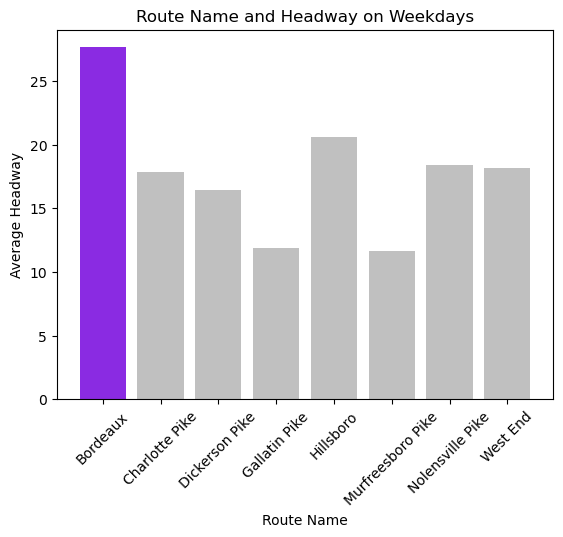

In [213]:
color = ('blueviolet', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver')
# ('blueviolet', 'mediumpurple', 'green', 'yellow', 'orange', 'purple', 'black', 'red')

plt.bar(avg_hdwy_per_route_name_on_time_wkdy['ROUTE_NAME'],
        avg_hdwy_per_route_name_on_time_wkdy['ACTUAL_HDWY'], 
        color = color)
plt.xticks(rotation = 45)
plt.title('Route Name and Headway on Weekdays')
plt.xlabel("Route Name")
plt.ylabel("Average Headway")
plt.show()

# this chart shows the average headway per route name for WEEKDAY    blueviolet

In [189]:
on_time_saturday = filtered_cols_for_q_3[
    (filtered_cols_for_q_3['ADJUSTED_ONTIME_COUNT'] == 1)
    & (filtered_cols_for_q_3['DAY_OF_WEEK'] == 'Saturday')
]
    
on_time_saturday 

,DAY_OF_WEEK,ROUTE_NAME,ADHERENCE_ID,DATE,TIME_POINT_ABBR,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,SCHEDULED_HDWY,ACTUAL_HDWY,ADJUSTED_ONTIME_COUNT
25847,Saturday,Bordeaux,99581536,2023-08-05,MHSP,2023-08-05 05:42:00,2023-08-05 05:32:56,2023-08-05 05:42:13,57.0,56.516666,1
25851,Saturday,Bordeaux,99581540,2023-08-05,MCC5_10,2023-08-05 06:15:00,2023-08-05 05:58:18,2023-08-05 06:16:22,60.0,60.866666,1
25856,Saturday,Bordeaux,99581545,2023-08-05,CV23,2023-08-05 06:54:00,2023-08-05 06:58:08,2023-08-05 06:58:08,30.0,34.550000,1
25858,Saturday,Bordeaux,99581547,2023-08-05,MCC5_10,2023-08-05 07:15:00,2023-08-05 07:05:54,2023-08-05 07:15:30,30.0,27.550000,1
25864,Saturday,Bordeaux,99581553,2023-08-05,MCC5_10,2023-08-05 08:15:00,2023-08-05 08:09:46,2023-08-05 08:18:04,30.0,28.383333,1
...,...,...,...,...,...,...,...,...,...,...,...
350314,Saturday,Hillsboro,100406600,2023-09-30,MCC5_9,2023-09-30 20:45:00,2023-09-30 20:40:02,2023-09-30 20:48:17,30.0,31.200000,1
350315,Saturday,Hillsboro,100406601,2023-09-30,21BK,2023-09-30 20:59:00,2023-09-30 21:02:20,2023-09-30 21:02:20,28.0,30.316666,1
350317,Saturday,Hillsboro,100406603,2023-09-30,HBHS,2023-09-30 21:16:00,2023-09-30 21:12:40,2023-09-30 21:16:51,28.0,26.066666,1
350320,Saturday,Hillsboro,100406606,2023-09-30,MCC5_9,2023-09-30 21:45:00,2023-09-30 21:43:52,2023-09-30 21:50:54,30.0,36.716666,1


In [190]:
shortened_df_on_time_saturday = on_time_saturday.loc[:, ['ROUTE_NAME', 'ACTUAL_HDWY']]
shortened_df_on_time_saturday

,ROUTE_NAME,ACTUAL_HDWY
25847,Bordeaux,56.516666
25851,Bordeaux,60.866666
25856,Bordeaux,34.550000
25858,Bordeaux,27.550000
25864,Bordeaux,28.383333
...,...,...
350314,Hillsboro,31.200000
350315,Hillsboro,30.316666
350317,Hillsboro,26.066666
350320,Hillsboro,36.716666


In [191]:
avg_hdwy_per_route_name_on_time_saturday = shortened_df_on_time_saturday.groupby('ROUTE_NAME')['ACTUAL_HDWY'].mean().reset_index()
avg_hdwy_per_route_name_on_time_saturday

avg_hdwy_per_route_name_on_time_saturday.rename(columns = {'ACTUAL_HDWY' : 'AVG_HDWY'})

,ROUTE_NAME,AVG_HDWY
0,Bordeaux,38.304815
1,Charlotte Pike,24.819635
2,Dickerson Pike,27.519643
3,Gallatin Pike,20.976497
4,Hillsboro,30.546274
5,Murfreesboro Pike,16.184233
6,Nolensville Pike,27.597118
7,West End,26.092777


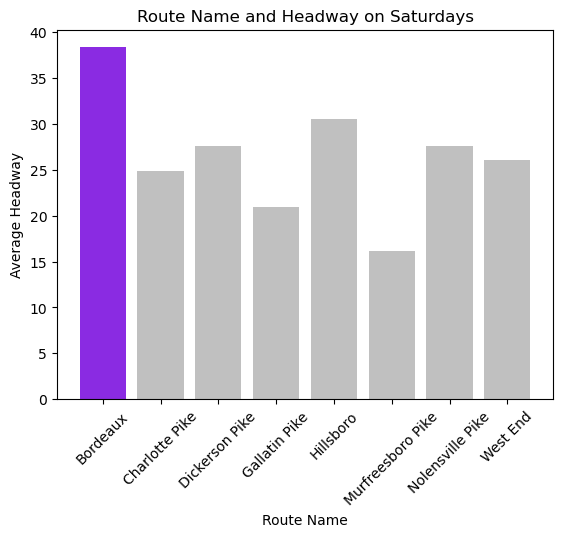

In [214]:
color = ('blueviolet', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver')
# ('blue', 'pink', 'green', 'yellow', 'orange', 'purple', 'black', 'red')

plt.bar(avg_hdwy_per_route_name_on_time_saturday['ROUTE_NAME'], avg_hdwy_per_route_name_on_time_saturday['ACTUAL_HDWY'], color = color)
plt.xticks(rotation = 45)
plt.title('Route Name and Headway on Saturdays')
plt.xlabel("Route Name")
plt.ylabel("Average Headway")
plt.show()

# this chart shows the average headway per route name for SATURDAY

In [196]:
on_time_sunday = filtered_cols_for_q_3[
    (filtered_cols_for_q_3['ADJUSTED_ONTIME_COUNT'] == 1)
    & (filtered_cols_for_q_3['DAY_OF_WEEK'] == 'Sunday')
]
on_time_sunday   # these are all the on-time buses on a SUNDAY

,DAY_OF_WEEK,ROUTE_NAME,ADHERENCE_ID,DATE,TIME_POINT_ABBR,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,SCHEDULED_HDWY,ACTUAL_HDWY,ADJUSTED_ONTIME_COUNT
30011,Sunday,Bordeaux,99601440,2023-08-06,MHSP,2023-08-06 06:47:00,2023-08-06 06:34:12,2023-08-06 06:48:06,30.0,28.866666,1
30012,Sunday,Bordeaux,99601441,2023-08-06,CV23,2023-08-06 06:56:00,2023-08-06 06:59:40,2023-08-06 06:59:40,30.0,32.450000,1
30014,Sunday,Bordeaux,99601443,2023-08-06,MCC5_10,2023-08-06 07:15:00,2023-08-06 07:06:13,2023-08-06 07:20:42,30.0,33.900000,1
30015,Sunday,Bordeaux,99601444,2023-08-06,CV23,2023-08-06 07:26:00,2023-08-06 07:27:37,2023-08-06 07:27:37,30.0,30.000000,1
30020,Sunday,Bordeaux,99601449,2023-08-06,CV23,2023-08-06 07:55:00,2023-08-06 07:51:12,2023-08-06 07:55:03,29.0,29.233333,1
...,...,...,...,...,...,...,...,...,...,...,...
313639,Sunday,Hillsboro,100220731,2023-09-24,MCC5_9,2023-09-24 20:45:00,2023-09-24 20:37:22,2023-09-24 20:48:40,30.0,30.583333,1
313640,Sunday,Hillsboro,100220732,2023-09-24,21BK,2023-09-24 20:59:00,2023-09-24 21:01:35,2023-09-24 21:01:35,28.0,26.766666,1
313642,Sunday,Hillsboro,100220734,2023-09-24,HBHS,2023-09-24 21:16:00,2023-09-24 21:11:18,2023-09-24 21:20:40,28.0,31.900000,1
313645,Sunday,Hillsboro,100220737,2023-09-24,MCC5_9,2023-09-24 21:45:00,2023-09-24 21:43:17,2023-09-24 21:48:39,30.0,32.050000,1


In [197]:
shortened_df_on_time_sunday = on_time_sunday.loc[:, ['ROUTE_NAME', 'ACTUAL_HDWY']]
shortened_df_on_time_sunday

,ROUTE_NAME,ACTUAL_HDWY
30011,Bordeaux,28.866666
30012,Bordeaux,32.450000
30014,Bordeaux,33.900000
30015,Bordeaux,30.000000
30020,Bordeaux,29.233333
...,...,...
313639,Hillsboro,30.583333
313640,Hillsboro,26.766666
313642,Hillsboro,31.900000
313645,Hillsboro,32.050000


In [198]:
avg_hdwy_per_route_name_on_time_sunday = shortened_df_on_time_sunday.groupby('ROUTE_NAME')['ACTUAL_HDWY'].mean().reset_index()
avg_hdwy_per_route_name_on_time_sunday

avg_hdwy_per_route_name_on_time_sunday.rename(columns = {'ACTUAL_HDWY' : 'AVG_HDWY'})

,ROUTE_NAME,AVG_HDWY
0,Bordeaux,41.033472
1,Charlotte Pike,24.026592
2,Dickerson Pike,31.074255
3,Gallatin Pike,20.952724
4,Hillsboro,30.786850
5,Murfreesboro Pike,20.057560
6,Nolensville Pike,26.950931
7,West End,26.668785


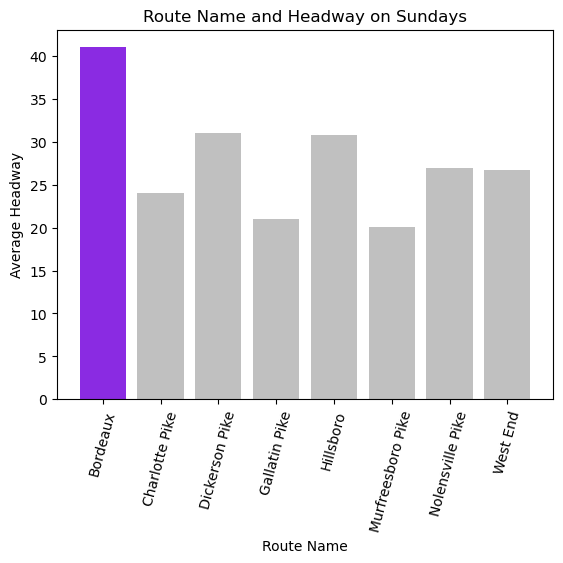

In [215]:
color = ('blueviolet', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver', 'silver')
('blue', 'pink', 'green', 'yellow', 'orange', 'purple', 'black', 'red')

plt.bar(avg_hdwy_per_route_name_on_time_sunday['ROUTE_NAME'], avg_hdwy_per_route_name_on_time_sunday['ACTUAL_HDWY'], color = color)
plt.xticks(rotation = 75)
plt.title('Route Name and Headway on Sundays')
plt.xlabel("Route Name")
plt.ylabel("Average Headway")
plt.show()

# this chart shows the average headway per route name for SATURDAY